In [41]:
import numpy as np
#import pyJHTDB
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import time as time_pkg
from point_bubble_JHTDB import analysis, model, interface
import pickle

In [42]:
case_name = r'for_sketch_beta0.5_dstarCd_0.2_Cl0.25'
res = pickle.load(open(case_name+'.pkl','rb'))

0.1364
------------------
0, 0.0, [1.90155214 5.99091283 4.92050611], 


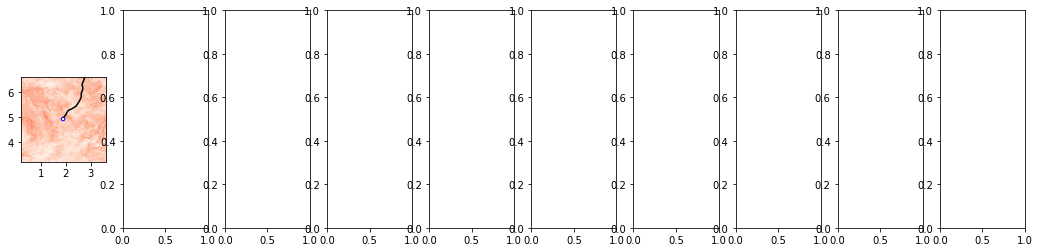

------------------
1000, 1.0, [2.61839218 5.80370169 5.7914662 ], 
------------------
2000, 2.0, [2.79254951 6.46806406 6.78025878], 
------------------
3000, 3.0, [3.20151196 7.51844165 8.01048693], 
------------------
4000, 4.0, [3.16237874 7.65760491 9.06856127], 
------------------
5000, 5.0, [2.84470237 6.86291605 9.2644341 ], 
------------------
6000, 6.0, [ 2.52969122  6.14883054 10.25938445], 
------------------
7000, 7.0, [ 1.80903753  6.68626516 11.48802623], 
------------------
8000, 8.0, [ 1.08973866  6.5913588  12.4468806 ], 
------------------
9000, 9.0, [ 1.75866497  6.1777614  13.2749191 ], 


In [43]:
L = model.L_int
#d = 0.1 # bubble diameter

#w = d*20

bi = 0
points = res['x'][:,bi,:]

beta = res['beta']
Fr = np.sqrt(res['A'])
C_D = 0.5
d_star = 3 * Fr**2 * C_D / (4*beta**2)
#d_star_by_Cd = 0.1
#d_star = d_star_by_Cd * C_D
d = d_star*L
print(d)

w = d*25

n_per_side = 301

skip = 1000
i_vec = np.arange(0,len(points),skip)
len(points)

fig,axs = plt.subplots(1,len(i_vec),figsize=(18,4))

coords = []
vels = []
for ii,i in enumerate(i_vec):

    t = res['t'][i]
    loc = points[i]
    z = np.linspace(loc[2]-w/2,loc[2]+w/2,n_per_side)
    x = np.linspace(loc[0]-w/2,loc[0]+w/2,n_per_side+1)
    X,Z = np.meshgrid(x,z)
    Y = np.ones_like(X)*loc[1]    
    XYZ = np.moveaxis(np.array([X,Y,Z]),0,-1)
    
    print('------------------')
    print(str(i)+', '+str(t)+', '+str(loc)+', ')
        
    XYZ_flat = np.reshape(XYZ,(len(x)*len(z),3))
    #print(np.shape(XYZ_flat))
    n = len(XYZ_flat)
    n_max = 4000
    n_call = int(n/n_max)+1
    #print('n_call = '+str(n_call))
    
    t1 = time_pkg.time()
    vel = []
    #velgrad = []
    for ni in range(n_call):
        vel.append(interface.get_velocity(t,XYZ_flat[ni*n_max:(ni+1)*n_max]))
        #velgrad.append(interface.get_velocity_gradient(t,XYZ_flat[ni*n_max:(ni+1)*n_max]))
    vel = np.concatenate(vel,axis=0)
    vel = np.reshape(vel,(len(z),len(x),3))
    vels.append(vel)
    coords.append(XYZ)
    
    speed = np.linalg.norm(vel,axis=-1)
    extent = [X.min(),X.max(),Z.min(),Z.max()]
    ax = axs[ii]
    ax.imshow(speed/res['v_q'],extent=extent,cmap='Reds',vmin=0,vmax=4,origin='lower')
    ax.plot(points[:,0],points[:,2],color='k')

    circ = Circle((loc[0],loc[2]),radius=d/2,facecolor='white',edgecolor='blue',zorder=np.inf)
    ax.add_patch(circ)

    ax.set_ylim(Z.min(),Z.max())
    ax.set_xlim(X.min(),X.max())
    
    plt.show()
    
d = {'vels':np.array(vels),
     'coords':np.array(coords),
     'i_vals':i_vec}

import pickle
pickle.dump(d,open(case_name+'_velfielddata.pkl','wb'))

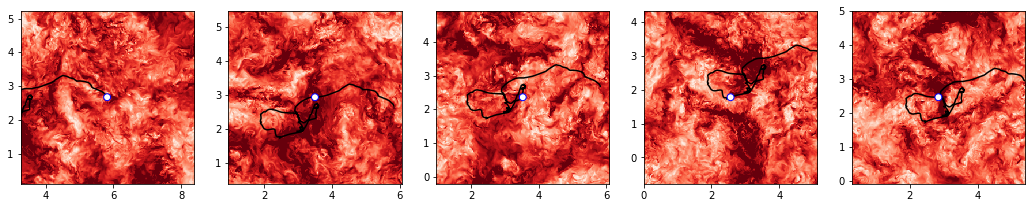

In [40]:
fig1=fig
fig1

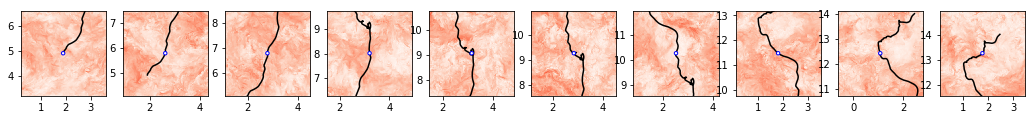

In [44]:
fig